In [ ]:
!unzip Dataset.zip -d Dataset

Archive:  Dataset.zip
   creating: Dataset/Dataset/
   creating: Dataset/Dataset/Test/
  inflating: Dataset/Dataset/Test/-1B_y4wGs-s.jpg  
  inflating: Dataset/Dataset/Test/00_oTQFRtzo.jpg  
  inflating: Dataset/Dataset/Test/05kVTNtfWwc.jpg  
  inflating: Dataset/Dataset/Test/05_eR8feuAo.jpg  
  inflating: Dataset/Dataset/Test/0AEL2WUlOtE.jpg  
  inflating: Dataset/Dataset/Test/0cgpyigyIkM.jpg  
  inflating: Dataset/Dataset/Test/0E_vhMVqL9g.jpg  
  inflating: Dataset/Dataset/Test/0hHTTow00w4.jpg  
  inflating: Dataset/Dataset/Test/0h_posg0DLo.jpg  
  inflating: Dataset/Dataset/Test/0lbFe-q86H0.jpg  
  inflating: Dataset/Dataset/Test/0qADtP.jpg  
  inflating: Dataset/Dataset/Test/0_yjxsqjTg0.jpg  
  inflating: Dataset/Dataset/Test/10xqRO1QuiY.jpg  
  inflating: Dataset/Dataset/Test/18kYlIHnliY.jpg  
  inflating: Dataset/Dataset/Test/1dHm3_7cHEo.jpg  
  inflating: Dataset/Dataset/Test/1g4YwpKr3ow.jpg  
  inflating: Dataset/Dataset/Test/1ICDwua2WkA.jpg  
  inflating: Dataset/Dataset/Test/

In [ ]:
!unzip Images.zip -d Images

Archive:  Images.zip
   creating: Images/Images/
  inflating: Images/Images/0fAtAB.jpg  
  inflating: Images/Images/0yTHvf.jpg  
  inflating: Images/Images/1QejlL 4.11.06 PM.jpg  
  inflating: Images/Images/2EkElw.jpg  
  inflating: Images/Images/35goEd.jpg  
  inflating: Images/Images/37G4TM.jpg  
  inflating: Images/Images/3y02df.jpg  
  inflating: Images/Images/3YFtxe.jpg  
  inflating: Images/Images/44su5Y.jpg  
  inflating: Images/Images/4r3yxj.jpg  
  inflating: Images/Images/4rztFn.jpg  
  inflating: Images/Images/51ut9t.jpg  
  inflating: Images/Images/6iRR3N.jpg  
  inflating: Images/Images/6mWRzQ.jpg  
  inflating: Images/Images/6v14hm.jpg  
  inflating: Images/Images/7TISHx.jpg  
  inflating: Images/Images/7Vizcm.jpg  
  inflating: Images/Images/8mRuWv.jpg  
  inflating: Images/Images/9KfZez.jpg  
  inflating: Images/Images/9ZxHgU.jpg  
  inflating: Images/Images/A7TMH8.jpg  
  inflating: Images/Images/aGvqRl.jpg  
  inflating: Images/Images/ayedF0.jpg  
  inflating: Images/

In [ ]:
#Importing Libraries

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

In [ ]:
#Getting Images

X1 = []
for imagename in os.listdir('Dataset/Dataset/Train/'):
    X1.append(img_to_array(load_img('Dataset/Dataset/Train/'+imagename)))
X1 = np.array(X1, dtype=float)

Xtrain = 1.0/255*X1

In [ ]:
#Getting Images

X2 = []
for imagename in os.listdir('Dataset/Dataset/Test/'):
    X2.append(img_to_array(load_img('Dataset/Dataset/Test/'+imagename)))
X2 = np.array(X2, dtype=float)

Xtest = rgb2lab(1.0/255*X2)[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X2)[:,:,:,1:]
Ytest = Ytest / 128

In [ ]:
len(X2)

140

In [ ]:
Xtrain.shape, Xtest.shape

((700, 256, 256, 3), (140, 256, 256, 1))

In [ ]:
# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

In [ ]:
#CNN model
model = Sequential()

#Input Layer
model.add(Conv2D(64, (3, 3), input_shape=(256, 256, 1), activation='relu', padding='same'))

#Hidden Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       1

<pre>
[(W−K+2P)/S]+1.
</pre>
W is the input volume<br>
K is the Kernel size <br>
P is the padding <br>
S is the stride 


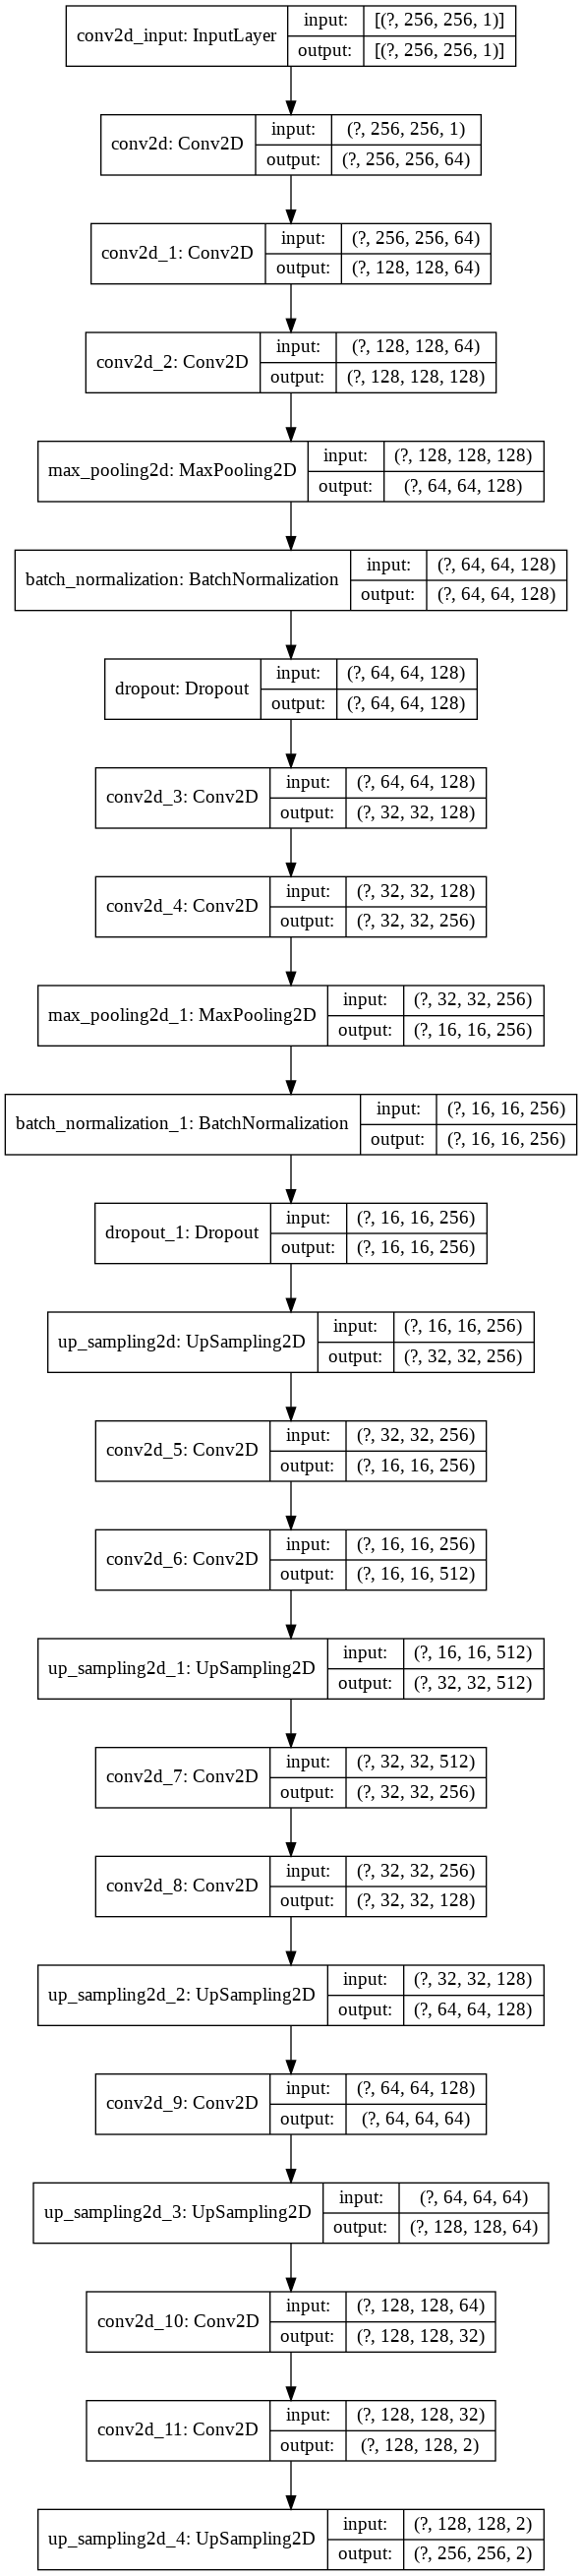

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Compiling the CNN
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4, rho=0.9, momentum=0.0, epsilon=1e-07,),
              loss='mse', metrics = ['accuracy'])

In [ ]:
# Generate training data
batch_size = 10
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

In [ ]:
# Train model      

trainedmodel = model.fit(image_a_b_gen(batch_size), epochs=500, steps_per_epoch=32)

Epoch 1/500
32/32 [==============================] - 11s 351ms/step - loss: 0.0165 - accuracy: 0.5224
Epoch 2/500
32/32 [==============================] - 12s 359ms/step - loss: 0.0109 - accuracy: 0.5407
Epoch 3/500
32/32 [==============================] - 12s 364ms/step - loss: 0.0112 - accuracy: 0.5330
Epoch 4/500
32/32 [==============================] - 12s 361ms/step - loss: 0.0097 - accuracy: 0.5826
Epoch 5/500
32/32 [==============================] - 12s 364ms/step - loss: 0.0087 - accuracy: 0.5690
Epoch 6/500
32/32 [==============================] - 12s 364ms/step - loss: 0.0108 - accuracy: 0.5593
Epoch 7/500
32/32 [==============================] - 12s 363ms/step - loss: 0.0103 - accuracy: 0.5749
Epoch 8/500
32/32 [==============================] - 12s 362ms/step - loss: 0.0097 - accuracy: 0.5760
Epoch 9/500
32/32 [==============================] - 12s 362ms/step - loss: 0.0094 - accuracy: 0.5749
Epoch 10/500
32/32 [==============================] - 12s 362ms/step - loss: 0.009

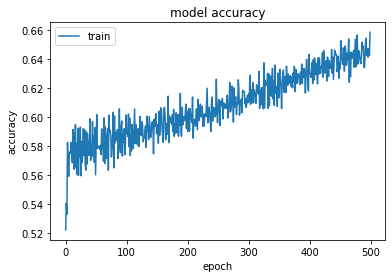

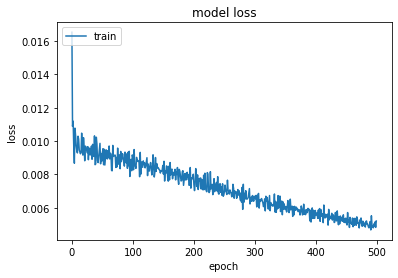

In [ ]:
# summarize history for accuracy
plt.plot(trainedmodel.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(trainedmodel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.evaluate(Xtest, Ytest, batch_size=10))

14/14 [==============================] - 1s 72ms/step - loss: 0.0098 - accuracy: 0.5759
[0.009832959622144699, 0.5759402513504028]


In [ ]:
# Save model

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")